# <center> Assignment 2: HR Analytics - Job Change of Data Scientists </center>

## Data

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

- The dataset is imbalanced.
- Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
- Missing imputation can be a part of your pipeline as well.

Ref: [HR Analytics - Job Change of Data Scientists](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)
**Data Descriptions**:

|Features|Descriptions
|-|-|
|enrollee_id| Unique ID for candidate|
|city| City code|
|city_ development _index| Developement index of the city (scaled)|
|gender| Gender of candidate|
|relevent_experience| Relevant experience of candidate|
|enrolled_university| Type of University course enrolled if any|
|education_level| Education level of candidate|
|major_discipline|Education major discipline of candidate|
|experience| Candidate total experience in years|
|company_size| No of employees in current employer's company|
|company_type| Type of current employer|
|lastnewjob| Difference in years between previous job and current job|
|training_hours| training hours completed|
|target| 0 – Not looking for job change, 1 – Looking for a job change|

**Train test split 80/20 random_state 42,KPI: f1-score - 0.75**

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import get_dummies
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
df_train = pd.read_csv("./train.csv")

## Analysing Data

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## Data Overview

In [5]:
df_train[['city','city_development_index','relevent_experience','gender','education_level','major_discipline','experience','company_size','company_type','target']].groupby(['gender','education_level','experience','company_size']).agg(["max",'mean',"min"]).style.background_gradient(cmap="viridis")

## Visualization

#### Countplots with respect to educational level 

##### This dataset contains 5 education level:

<li>Graduate<br></li>
<li>Masters<br></li>
<li>High School<br></li>
<li>PhD<br></li>
<li>Primary School</li>

This is an example of how to visualize and analyze related features.

In fact, you can visualize several feature combinations based on your orginial hypothesis.

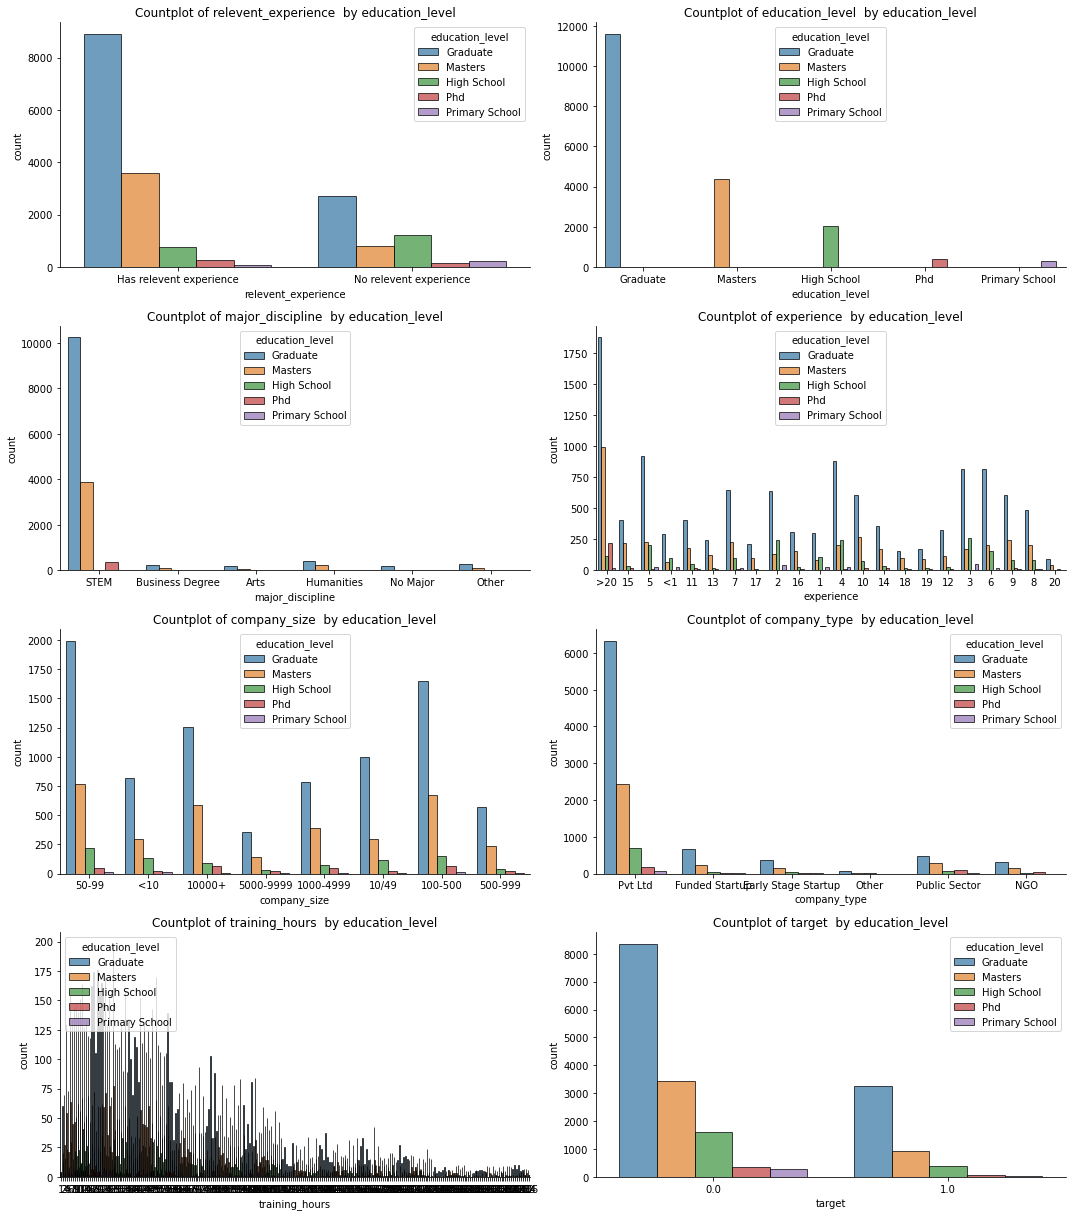

In [6]:
#Countplots showing the frequency of each category with respect to education level 
plt.figure(figsize=[15,17])
plot=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type", "training_hours","target"]
n=1
for f in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df_train)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

### Handle missing values

This is an example of how to engineer feature and handle missing value.

In [7]:
df_train['experience'].value_counts(dropna=False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

In [8]:
def clean_experience(df):
    df["experience"] = df["experience"].fillna(0)
    df["experience"] = [27 if x == ">20" else (0 if x == "<1" else int(x)) for x in df["experience"]]
    return df

df_train = clean_experience(df_train)

In [9]:
df_train['experience'].value_counts(dropna=False)

27    3286
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
0      587
14     586
1      549
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: experience, dtype: int64

### Distribution of Training Hours

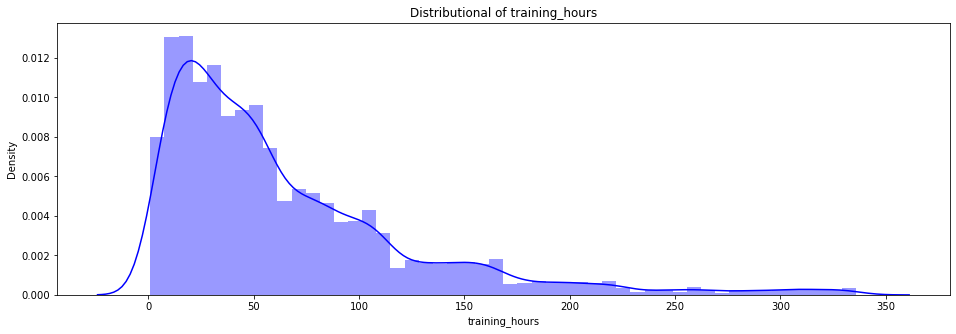

In [10]:
# Taining_hours
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df_train["training_hours"], color="blue",ax = axes)
plt.title("Distributional of training_hours")
plt.show()

### Education Level Vs Training Hours

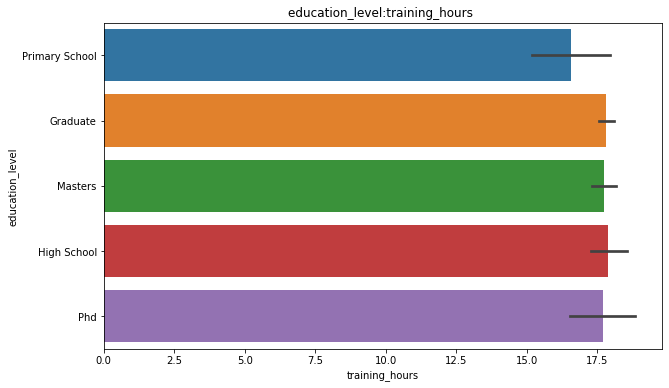

In [11]:
# education_level:training_hours
et = df_train.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=et.education_level, x=et.training_hours)
plt.xticks()
plt.xlabel('training_hours')
plt.ylabel('education_level')
plt.title('education_level:training_hours ')
plt.show()

# Data Preprocessing 

#### Fill missing value with Unknown for education aspects 

In [12]:
def fill_unknown_missing_value(df):
    for col in ["gender", "education_level", "major_discipline","company_type"]:
        df[col] = df[col].fillna("Unknown") # No, baseline
    df["experience"] = df["experience"].fillna(df["experience"].mean())
    return df
df_train = fill_unknown_missing_value(df_train)

#### Transform company size and fill missing value 

In [13]:
df_train.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [14]:
def transform_company_size(df):
    df["company_size"]= df["company_size"].fillna('0-0')
    df['company_size'] = ['10-49' if x == "10/49" else ('1-9' if x == '<10' else ('10000-20000' if x =='10000+' else x)) for x in df['company_size']]
    df['company_size_min'] = [int(x.split('-')[0]) for x in df['company_size']]
    df['company_size_max'] = [int(x.split('-')[1]) for x in df['company_size']]
    return df

df_train = transform_company_size(df_train)

#### Cleaning company_size to attain the required format and split them into min and max company_size 

In [15]:
def transform_last_new_job(df):
    df['last_new_job']  = df['last_new_job'].fillna('never')
    df['last_new_job']  =  [0 if x == 'never' else (6 if x == '>4' else int(x)) for x in df['last_new_job']]
    return df
df_train = transform_last_new_job(df_train)

#### Transform city format and relavant experience

In [16]:
df_train.city.unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [17]:
def transform_city(df):
    df['city'] = [int(x.split('_')[1]) for x in df['city']]
    return df

df_train = transform_city(df_train)

In [18]:
def transform_relevant_experience(df):
    df["relevent_experience"] = [ 1 if x == 'Has relevent experience' else 0 for x in df["relevent_experience"]]
    return df

df_train = transform_relevant_experience(df_train)

## One Hot encoding
It is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [19]:


def one_hot_encoding(df):
    enrolled_dummies = pd.get_dummies(df["enrolled_university"], dummy_na=True)
    gender_dummies = pd.get_dummies(df["gender"], dummy_na=True)
    education_dummies = pd.get_dummies(df["education_level"],dummy_na=True)
    stream_dummies = pd.get_dummies(df["major_discipline"],dummy_na=True)
    company_dummies = pd.get_dummies(df["company_type"],dummy_na=True)
    df["Type_no_enrollment"] = enrolled_dummies["no_enrollment"]
    df["Type_Full_time_course"] = enrolled_dummies["Full time course"]
    df["Type_Part_time_course"]=enrolled_dummies["Part time course"]
    df["Gender_Male"] = gender_dummies["Male"]
    df["Gender_Female"] =gender_dummies["Female"]
    df["Gender_Unknown"]=gender_dummies["Unknown"]
    df["Gender_Other"]=gender_dummies["Other"]
    df["Education_Graduate"] = education_dummies["Graduate"]
    df["Education_Masters"] = education_dummies["Masters"]
    df["Education_High_School"] = education_dummies["High School"]
    df["Education_Primary_School"] = education_dummies["Primary School"]
    df["Education_Phd"] = education_dummies["Phd"]
    df["Education_Unknown"] = education_dummies["Unknown"]
    df["Stream_STEM"] = stream_dummies["STEM"]
    df["Stream_Humanities"] = stream_dummies["Humanities"]
    df["Stream_Other"] = stream_dummies["Other"]
    df["Stream_Business_Degree"] = stream_dummies["Business Degree"]
    df["Stream_Arts"] = stream_dummies["Arts"]
    df["Stream_No_Major"] = stream_dummies["No Major"]
    df["Stream_Unknown"] = stream_dummies["Unknown"]
    df["Company_Pvt_Ltd"] = company_dummies["Pvt Ltd"]
    df["Company_Funded_Startup"] = company_dummies["Funded Startup"]
    df["Company_Public_Sector"]=company_dummies["Public Sector"]
    df["Company_Early_Stage_Startup"] = company_dummies["Early Stage Startup"]
    df["Company_NGO"] = company_dummies["NGO"]
    df["Company_Other"] = company_dummies["Other"]
    df["Company_Unknown"] = company_dummies["Unknown"]

one_hot_encoding(df_train)

In [38]:
df_train

,city,city_development_index,relevent_experience,experience,last_new_job,training_hours,target,company_size_min,company_size_max,Type_no_enrollment,...,Stream_Arts,Stream_No_Major,Stream_Unknown,Company_Pvt_Ltd,Company_Funded_Startup,Company_Public_Sector,Company_Early_Stage_Startup,Company_NGO,Company_Other,Company_Unknown
0,103,0.920,1,27,1,36,1.0,1332,2918,1,...,0,0,0,0,0,0,0,0,0,1
1,40,0.776,0,15,6,47,0.0,50,99,1,...,0,0,0,1,0,0,0,0,0,0
2,21,0.624,0,5,0,83,0.0,1332,2918,0,...,0,0,0,0,0,0,0,0,0,1
4,162,0.767,1,27,4,8,0.0,50,99,1,...,0,0,0,0,1,0,0,0,0,0
5,176,0.764,1,11,1,24,1.0,1332,2918,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,0,14,1,42,1.0,1332,2918,1,...,0,0,0,0,0,0,0,0,0,1
19154,103,0.920,1,14,4,52,1.0,1332,2918,1,...,0,0,0,0,0,0,0,0,0,1
19155,103,0.920,1,27,4,44,0.0,50,99,1,...,0,0,0,1,0,0,0,0,0,0
19156,65,0.802,1,0,2,97,0.0,500,999,1,...,0,0,1,1,0,0,0,0,0,0


In [21]:
df_train = df_train.dropna(subset=['enrolled_university',"last_new_job"])

In [22]:
def norm_company_size(df):
    df["company_size_min"] = df["company_size_min"].fillna(int(df["company_size_min"].mean()))
    df["company_size_min"] = [int(df["company_size_min"].mean()) if x == 0 else x for x in df["company_size_min"]]
    df["company_size_max"] = df["company_size_max"].fillna(int(df["company_size_max"].mean()))
    df["company_size_max"] = [int(df["company_size_max"].mean()) if x == 0 else x for x in df["company_size_max"]]
    return df 

df_train = norm_company_size(df_train)

<center><img src="https://media.tenor.com/images/aa37ff519d18dc4b51b8a55fb36e27e7/tenor.gif"></img></center><br>
<center><font size = 4 color = "red">Data Cleaning done successfully ✨</font></center>

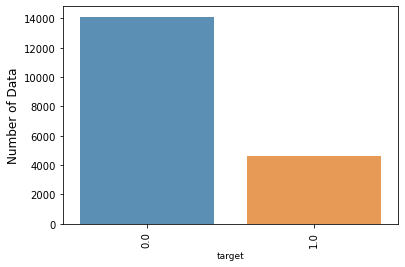

In [23]:
# Target
# 0 – Not looking for job change,
# 1 – Looking for a job change
# As you can see, here we have imbalanced data, the number of 1 ( Looking for a job change) < 0 (Not looking for job change)
mnj = df_train['target'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(mnj.index, mnj.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show()

In [24]:
df_train = df_train.drop(['enrollee_id','gender','enrolled_university','education_level','major_discipline','company_type','company_size'],axis=1)

In [25]:
X = df_train.drop("target",axis=1)
Y = pd.DataFrame(df_train["target"])

## Data Upscaling

- Imbalanced:
    - Upsampling:
    - Downsampling -> not recommended -> loss information

In [26]:
smote = SMOTE() # not duplicated!
X, Y = smote.fit_resample(X, Y)

In [27]:
Y["target"].value_counts()

0.0    14118
1.0    14118
Name: target, dtype: int64

### Data Balanced Successfully 🤘

# Normalization
### Noramalizing the train & test data for better accuracy

In [28]:
df_train_final = X.copy()
df_train_final['target'] = Y

In [29]:
cols_to_be_normalized = ["city","city_development_index","experience","last_new_job","training_hours","company_size_min","company_size_max"]
cols_not_to_be_normalized = ["relevent_experience","Type_no_enrollment","Type_Full_time_course","Type_Part_time_course","Gender_Male","Gender_Female","Gender_Unknown",
                            "Gender_Other","Education_Graduate","Education_Masters","Education_High_School","Education_Primary_School","Education_Phd",
                            "Education_Unknown","Stream_STEM","Stream_Humanities","Stream_Other","Stream_Business_Degree","Stream_Arts","Stream_No_Major",
                            "Stream_Unknown","Company_Pvt_Ltd","Company_Funded_Startup","Company_Public_Sector", "Company_Early_Stage_Startup", "Company_NGO",
                            "Company_Other", "Company_Unknown", "target"]

train_normalized = normalize(df_train_final[cols_to_be_normalized])
train_boolean = df_train_final[cols_not_to_be_normalized]
df_train_normalized = pd.DataFrame(train_normalized,columns = cols_to_be_normalized)
df_train_boolean = pd.DataFrame(train_boolean,columns=cols_not_to_be_normalized)

df_train_final = df_train_normalized.merge(df_train_boolean,left_index=True, right_index=True)

### Splitting  Independent & dependent varaiables 

In [30]:
X = df_train_final.drop("target",axis = 1)
Y = df_train_final["target"]

### Train Test Split 

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True, stratify = Y)

# <font color = "red">Logistic Regression</font>
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).'

In [32]:
logitsic_model = LogisticRegression()

### Fitting the data into Logistic Model

In [33]:
logitsic_model.fit(X_train,Y_train)

LogisticRegression()

### Predicting x_test with trained model

In [34]:
Y_pred = logitsic_model.predict(X_test)

### Evaluation Metrics


#### Classification Report

In [35]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84      3530
         1.0       0.92      0.70      0.80      3529

    accuracy                           0.82      7059
   macro avg       0.84      0.82      0.82      7059
weighted avg       0.84      0.82      0.82      7059



#### Confusion Matrix

In [36]:
confusion_matrix(Y_test,Y_pred)

array([[3318,  212],
       [1059, 2470]], dtype=int64)

#### Accuracy Score

In [37]:
print ("Accuracy : ", accuracy_score(Y_test, Y_pred)) 

Accuracy :  0.8199461680124663


<center><img src="https://media1.giphy.com/media/2vq9I9HGKrpjaHNLVb/giphy.gif"></img></center><br>